<a href="https://colab.research.google.com/github/subah2004/Handwritten-digits-recognition-/blob/Pramod-Katchalla/Handwritten_Digit_Classification_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#import file and reading few lines
digits = pd.read_csv('/content/digit_svm.csv')
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
digits.shape


(42000, 785)

In [ ]:
#checking datatype
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
digits.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
#checking for null values
digits.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
# let us check unique entries of label column
np.unique(digits['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


Text(0.5, 1.0, 'Digit 0')

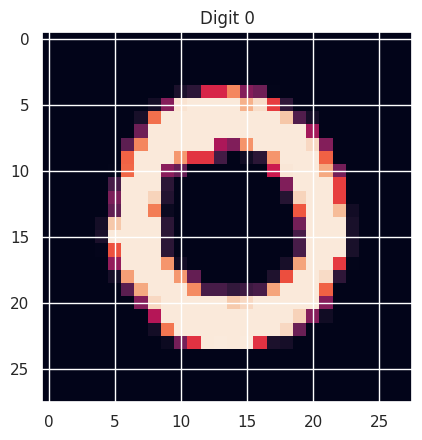

In [ ]:
# Plotting few samples as well as converting into matrix
zero = digits.iloc[1, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Digit 0")

Text(0.5, 1.0, 'Digit 1')

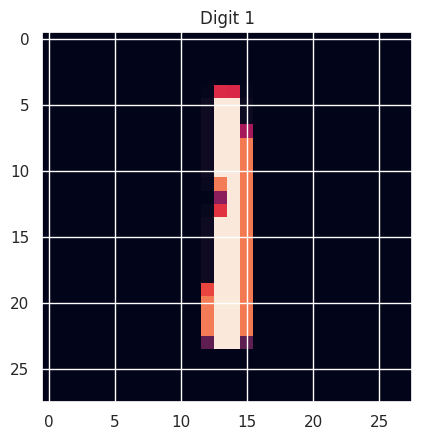

In [ ]:
one = digits.iloc[2, 1:]
one = one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

Text(0.5, 1.0, 'Digit 2')

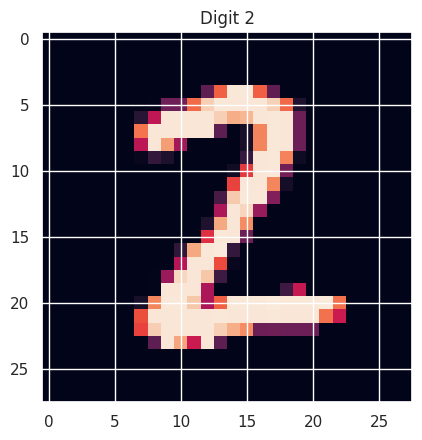

In [ ]:
two = digits.iloc[22, 1:]
two = two.values.reshape(28,28)
plt.imshow(two)
plt.title("Digit 2")

Text(0.5, 1.0, 'Digit 9')

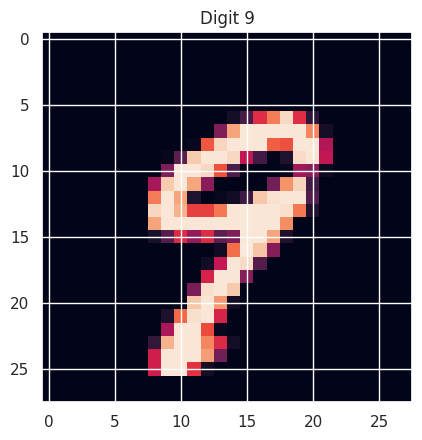

In [ ]:
nine = digits.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

Text(0.5, 1.0, 'Digit 4')

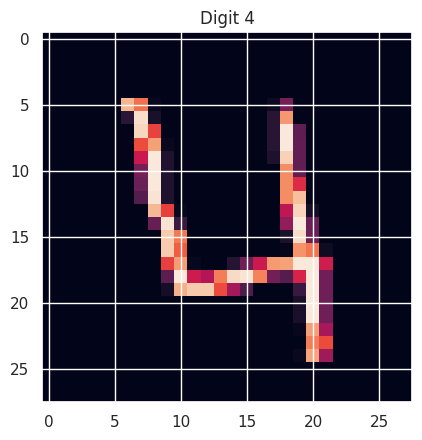

In [ ]:
four = digits.iloc[3, 1:]
four = four.values.reshape(28,28)
plt.imshow(four)
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

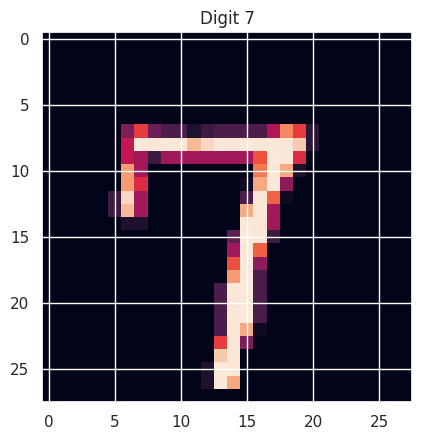

In [ ]:
seven = digits.iloc[6, 1:]
seven = seven.values.reshape(28,28)
plt.imshow(seven)
plt.title("Digit 7")

<Axes: >

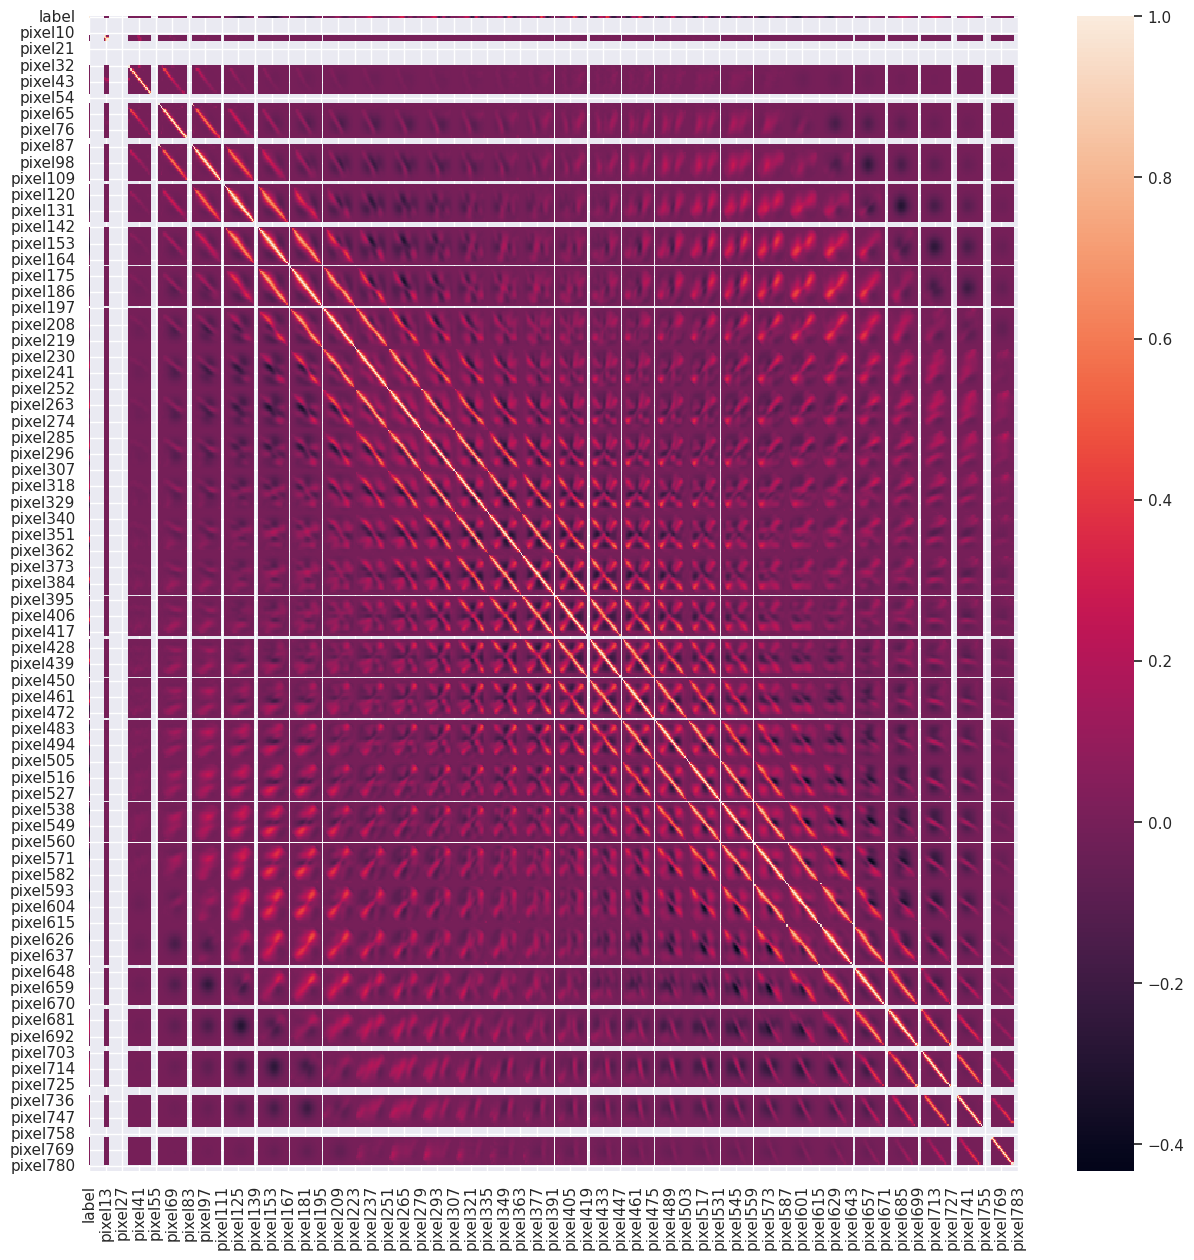

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=digits.corr(),annot=False)

In [ ]:
# average feature values
pd.set_option('display.max_rows', 999)
round(digits.drop('label', axis=1).mean(), 2).sort_values(ascending = False)

,0
pixel407,139.83
pixel435,139.07
pixel408,137.42
pixel434,135.52
pixel211,135.49
pixel210,133.59
pixel602,132.98
pixel212,132.90
pixel436,132.00
pixel601,130.81


In [ ]:
# seperating the X and Y variable
X = digits.drop("label", axis = 1)
Y = digits['label']
print(digits.shape)

(42000, 785)


In [ ]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.2,test_size = 0.8, random_state = 101)

In [ ]:
print('X_digit shape:',X_train.shape)
print('Y_digit shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_digit shape: (8400, 784)
Y_digit shape: (8400,)
X_test shape: (33600, 784)
Y_test shape: (33600,)


In [ ]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, Y_train)

# predict
y_pred = model_linear.predict(X_test)

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# confusion matrix
print("confusion matrix:\n",metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.913125 

confusion matrix:
 [[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [ ]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



#Non Linear Model
###1.Poly Kernel

In [ ]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
non_linear_model_poly = SVC(kernel='poly')

# fit
non_linear_model_poly.fit(X_train, Y_train)

# predict
y_pred = non_linear_model_poly.predict(X_test)

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# confusion matrix
print("confusion matrix:\n",metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.8822619047619048 

confusion matrix:
 [[2927    0    9    3   43   11   27    0  262    3]
 [   1 3681   11    2   12    0    6    0   45    2]
 [  15   18 2562   31  152    2   10   23  520   10]
 [   0   16   23 2921   28   40    3   15  387   42]
 [   3    8   14    0 3110    8    4    5   13  125]
 [   6    1    5   68   76 2429   29    7  377   41]
 [  17    8    9    0  101   45 2943    2  152    0]
 [   1   34    8    8  155    1    0 2918   77  302]
 [   3   16    7   29   25   39    3    5 3128   17]
 [   5   11    1   17  166    8    0   41   81 3025]]


In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, Y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy, precision, recall

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# confusion matrix
print("confusion matrix:\n",metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9396130952380952 

confusion matrix:
 [[3195    0   22    6    4    9   32    4   13    0]
 [   0 3690   23   13    7    2    7    6    8    4]
 [  15   14 3146   31   31    5   18   37   41    5]
 [   3    8   96 3192    5   72    6   30   43   20]
 [   3    7   57    1 3095   10   20   24    6   67]
 [  15    9   40   66   15 2780   50   15   31   18]
 [  18    5   48    1   11   31 3149    2   12    0]
 [   6   21   72   11   23    3    0 3284    3   81]
 [  13   24   42   63   14   63   22   19 2994   18]
 [  12   10   42   39   80    6    0   96   24 3046]]


In [ ]:
#precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



In [ ]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specifying range of hyperparameters
# Setting the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)

# fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,70.121973,5.984015,17.362195,0.728756,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,9,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,15.365290,1.131392,9.448480,0.413761,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,3,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,18.965810,1.166251,13.065057,0.601349,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,6,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,61.082500,2.453818,15.447452,0.530432,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,12.697049,0.929070,8.391917,0.577243,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,8.698142,0.749995,7.308914,1.041267,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,4,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,62.788718,2.521264,15.557921,0.608626,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,12.013440,1.652630,7.947858,0.868557,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,8.978925,0.719155,6.448174,0.776256,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,5,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645


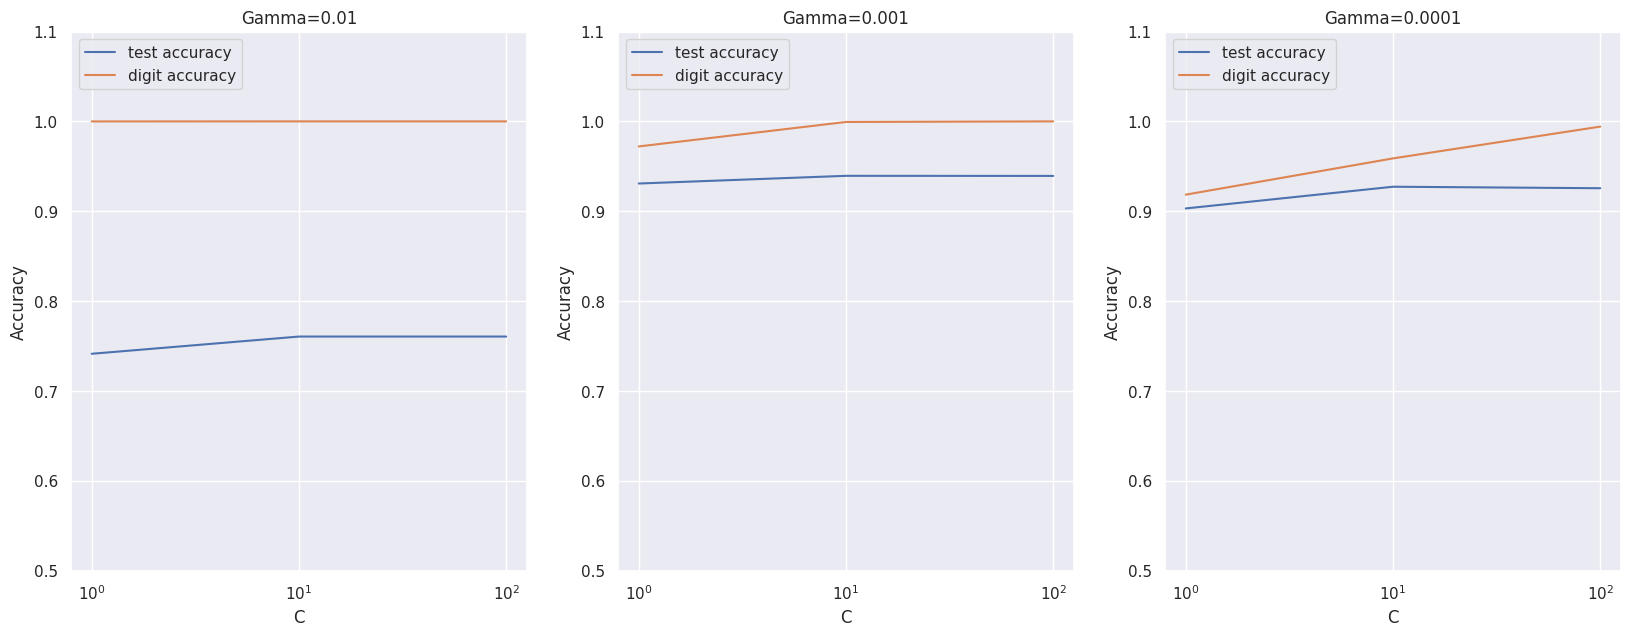

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,7))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.50, 1.1])
plt.legend(['test accuracy', 'digit accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy:", metrics.accuracy_score(Y_test, y_pred), "\n")
print("confusion matrix:\n",metrics.confusion_matrix(Y_test, y_pred), "\n")

accuracy: 0.9477083333333334 

confusion matrix:
 [[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



In [ ]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3285
           1       0.98      0.98      0.98      3760
           2       0.90      0.95      0.92      3343
           3       0.95      0.93      0.94      3475
           4       0.94      0.95      0.94      3290
           5       0.94      0.93      0.93      3039
           6       0.96      0.97      0.96      3277
           7       0.94      0.95      0.94      3504
           8       0.96      0.93      0.94      3272
           9       0.95      0.92      0.93      3355

    accuracy                           0.95     33600
   macro avg       0.95      0.95      0.95     33600
weighted avg       0.95      0.95      0.95     33600

